# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anthonysegovia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
load_dotenv('keys.env')
api_key = os.getenv("NEWS_API_KEY")


In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q='bitcoin', 
    language='en',
    sort_by='relevancy'
)


In [10]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum", 
    language="en", 
    sort_by='relevancy',
    page_size=100
)


In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,2022-02-15,The confiscation of the Bitcoin that remained ...,0.6486,0.146,0.000,0.854
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000


In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [13]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.104240,0.070700,0.042950,0.886350
std,0.454826,0.050385,0.063762,0.069078
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.199425,0.044000,0.000000,0.851750
50%,0.102600,0.067500,0.000000,0.875500
75%,0.455475,0.099500,0.073000,0.938500
max,0.735100,0.152000,0.187000,1.000000


In [14]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.160073,0.082870,0.04400,0.873110
std,0.442328,0.068719,0.06392,0.083886
min,-0.913600,0.000000,0.00000,0.627000
25%,-0.012900,0.018750,0.00000,0.832750
50%,0.202300,0.073500,0.00000,0.875000
75%,0.510600,0.125250,0.06725,0.927250
max,0.862500,0.290000,0.31200,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/anthonysegovia/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonysegovia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonysegovia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anthonysegovia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))


# Expand the default stopwords list if necessary
sw_addons = {'bitcoin', 'ethereum'}

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words("english"))
    
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', str(text))

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
 
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    return tokens

In [18]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head(10)


,date,text,compound,positive,negative,neutral,tokens
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
1,2022-02-15,The confiscation of the Bitcoin that remained ...,0.6486,0.146,0.000,0.854,"[confiscation, remained, mr, lichtensteins, wa..."
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[wa, seen, many, libertarianleaning, fan, kind..."
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[feb, reuters, miner, feeling, heat, pain, rip..."
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[march, reuters, ha, leapt, since, russias, in..."
5,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854,"[whose, side, cryptocurrency, asked, satoshi, ..."
6,2022-03-05,Getty\r\nWelcome to Nonfungible Tidbits. Our f...,-0.6808,0.074,0.187,0.739,"[gettywelcome, nonfungible, tidbits, focus, we..."
7,2022-02-19,An appeals court decided shilling for an unreg...,0.3400,0.066,0.000,0.934,"[appeal, court, decided, shilling, unregistere..."
8,2022-02-28,Nurphoto/Getty\r\nAs Russia launched an invasi...,0.1280,0.048,0.000,0.952,"[nurphotogettyas, russia, launched, invasion, ..."
9,2022-02-15,Feb 15 (Reuters) - Bristling tensions and loom...,-0.2640,0.066,0.120,0.815,"[feb, reuters, bristling, tension, looming, la..."


In [19]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head(10)

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[people, colorado, able, pay, state, tax, cryp..."
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, a..."
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
5,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."
6,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."
7,2022-02-17,"Last night, Twitter announced itll allow users...",0.2263,0.056,0.000,0.944,"[last, night, twitter, announced, itll, allow,..."
8,2022-02-18,"At over two hours long, the wildly popular new...",-0.1027,0.070,0.105,0.825,"[two, hour, long, wildly, popular, new, youtub..."
9,2022-03-02,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000,"[cryptocurrency, boom, past, year, ha, helped,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [44]:
# Process text
bitcoin_big_string = ' '.join(bitcoin_df["text"])
bitcoin_processed = tokenizer(bitcoin_text)

# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('charsfeb', 'reuters'): 2, ('charsmarch', 'reuters'): 2, ('march', 'reuters'): 2, ('charssan', 'salvador'): 2, ('reuters', 'el'): 2, ('el', 'salvador'): 2, ('central', 'american'): 2, ('even', 'cyberspace'): 1, ('cyberspace', 'department'): 1, ('department', 'justice'): 1}


In [45]:
# Process text
ethereum_big_string = ' '.join(ethereum_df["text"])
ethereum_processed = tokenizer(ethereum_df["text"])

# Generate the Bitcoin N-grams where N=2
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('february', 'shit'): 1, ('shit', 'hit'): 1, ('hit', 'fan'): 1, ('fan', 'usual'): 1, ('usual', 'way'): 1, ('way', 'technical'): 1, ('technical', 'analysis'): 1, ('analysis', 'isnt'): 1, ('isnt', 'perfect'): 1, ('perfect', 'tool'): 1}


In [46]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [47]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('reuters', 8),
 ('russia', 4),
 ('salvador', 4),
 ('u', 3),
 ('wa', 3),
 ('charsfeb', 3),
 ('country', 3),
 ('march', 3),
 ('market', 3),
 ('justice', 2)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('cryptocur', 2),
 ('february', 1),
 ('shit', 1),
 ('hit', 1),
 ('fan', 1),
 ('usual', 1),
 ('way', 1),
 ('technical', 1),
 ('analysis', 1),
 ('isnt', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

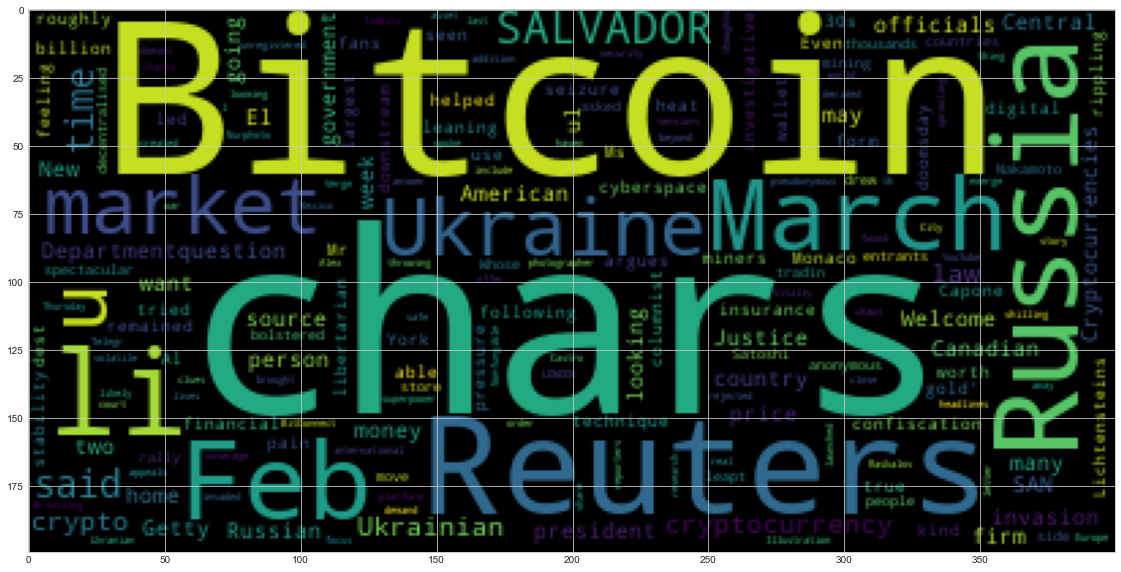

In [49]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_big_string)
plt.imshow(wc)

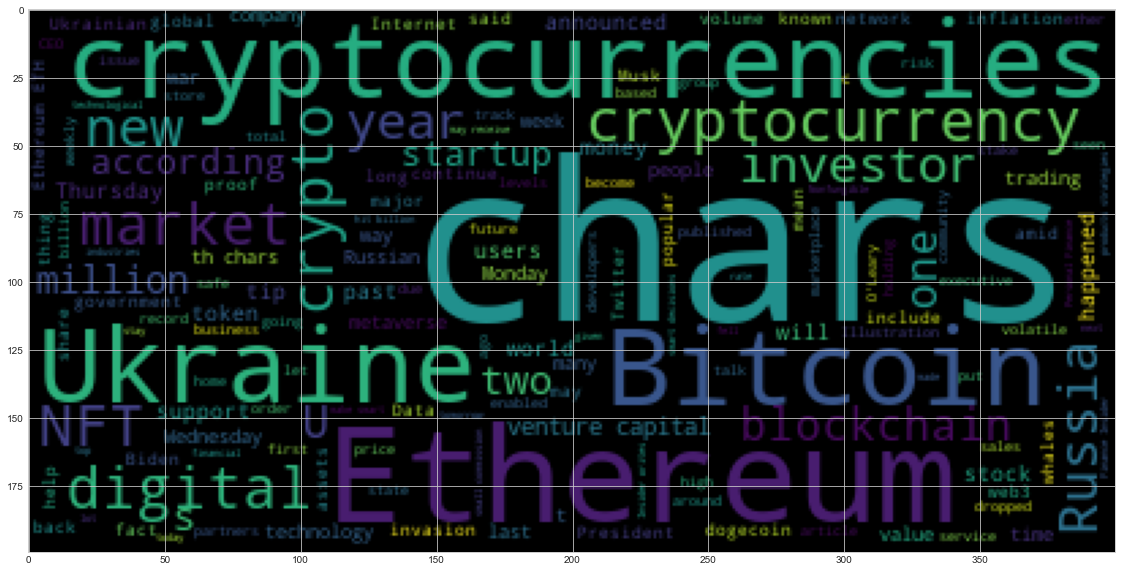

In [50]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [86]:
import spacy
from spacy import displacy

In [87]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [88]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_df["text"].str.cat()

In [90]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [91]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [92]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
the New York Times ORG
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
15 CARDINAL
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
Reuters ORG
BITCOIN PERSON
15 CARDINAL
Reuters ORG
U.S. GPE
Joe Biden PERSON
Summary</li><li> WORK_OF_ART
Law firms</li><li>
 PERSON
documents</li></ul GPE
Ukrainian NORP
Tom Lee PERSON
Ukraine GPE
Shark Tank WORK_OF_ART
Kevin O'Leary's PERSON
100,000 MONEY
200,000 MONEY
300,000 MONEY
two-week DATE
Tuesday DATE
Russians NORP
Ukrainians NORP
Feb 20 DATE
Reuters ORG
El Salvador GPE
Nayib

---

### Ethereum NER

In [82]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_df["text"].str.cat()

In [83]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [84]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [85]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
TIME ORG
weekly DATE
Biden PERSON
Wednesday DATE
first ORDINAL
Brett Harrison PERSON
Bitcoin PERSON
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
American Express ORG
Russia GPE
Ukraine GPE
Opera ORG
Keshas PERSON
Opera ORG
Monday DATE
Finance Insider PERSON
American Express ORG
Ukrainian NORP
more than $4 million MONEY
Russia GPE
Elliptic LOC
Ukraine GPE
Russia GPE
Elliptic PRODUCT
nearly $55 million MONEY
Russia GPE
Ukraine GPE
Bloomberg GPE


---